# Program: EDA on cereals data
## Author: Mradul Mourya
## Date: 03/02/2021
## Purpose: Learning by practicing Exploratory Data Analysis, Creating bar graph, normalized bar graph, histogram, and normalized histogram


In [1]:
import matplotlib.pyplot as plt # import matplotlib for plotting graphs

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
plt.rcParams.update({'figure.autolayout': True})
import pandas as pd # import pandas for file reading
import numpy as np # # import for creating columns in graphs

In [5]:
cereals_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/cereals (1).CSV")
cereals_data.head() # checking if the data has loaded correctly


,Name,Manuf,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vitamins,Shelf,Weight,Cups,Rating,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973,1,1,0,0,0,0,0
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679,1,0,1,0,0,0,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505,1,0,0,1,0,0,0
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912,1,0,0,1,0,0,0
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843,1,0,0,0,0,1,0


In [7]:
# Creates contingency table between Manuf and Type
crosstab_01 = pd.crosstab( \
    cereals_data['Manuf'], \
    cereals_data['Type'])

In [8]:
print(crosstab_01) # printing table

Type   C   H 
Manuf        
A       0   1
G      22   0
K      23   0
N       5   1
P       9   0
Q       7   1
R       8   0


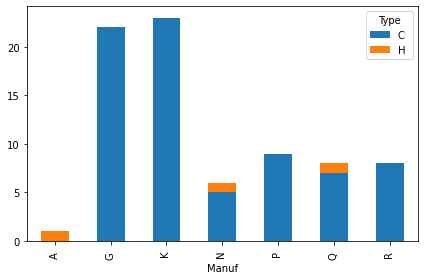

In [10]:
# creating Manuf bar graph with Type as an overlay
crosstab_01.plot( kind = 'bar', stacked = True )

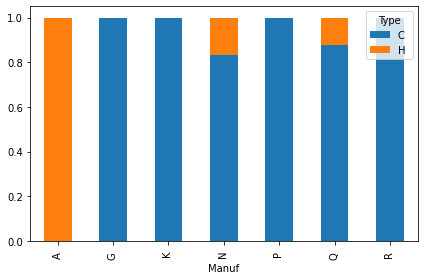

In [11]:
# creating the normalized version of above created bar graph
crosstab_norm = crosstab_01.div( crosstab_01.sum(axis = 1), axis = 0 )
crosstab_norm.plot(kind='bar', stacked = True) # plotting the graph

In [12]:
# Histogram of Calories with Manuf Overlay
# Separate the variable of the graph by the Manuf overlay
# separate the variable Calories, cereals_data[‘Calories’], by the seven values of the variable Manuf
# then creating seven different variables to store that
manuf_n = cereals_data[cereals_data.Manuf == 'N ']['Calories']
manuf_q = cereals_data[cereals_data.Manuf == 'Q ']['Calories']
manuf_k = cereals_data[cereals_data.Manuf == 'K ']['Calories']
manuf_r = cereals_data[cereals_data.Manuf == 'R ']['Calories']
manuf_g = cereals_data[cereals_data.Manuf == 'G ']['Calories']
manuf_p = cereals_data[cereals_data.Manuf == 'P ']['Calories']
manuf_a = cereals_data[cereals_data.Manuf == 'A ']['Calories'] 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


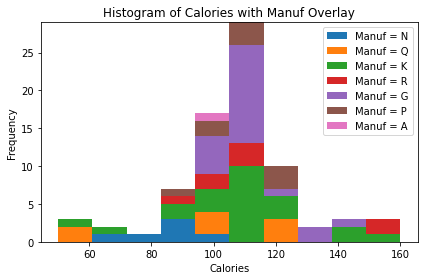

In [13]:
# plotting a stacked histogram using seven variables as overlay
# Also, here storing the various variables in n and bins in variable bins to later use to create its normalized version
(n, bins, patches) = plt.hist([manuf_n, manuf_q,manuf_k,manuf_r,manuf_g,manuf_p,manuf_a], bins = 10, stacked = True) 
plt.legend(['Manuf = N', 'Manuf = Q','Manuf = K','Manuf = R','Manuf = G','Manuf = P','Manuf = A']) 
plt.title("Histogram of Calories with Manuf Overlay") 
plt.xlabel("Calories"); plt.ylabel("Frequency"); plt.show()

In [14]:
# construction the matrix, combine the height of the seven variables into one array
n_table = np.column_stack((n[0], n[1], n[2], n[3], n[4], n[5], n[6]))

In [15]:
# finding proportions of the bar
n_norm = n_table / n_table.sum(axis=1)[:, None]

In [17]:
# creates an array whose rows are the exact cuts
ourbins = np.column_stack((bins[0:10], bins[1:11]))

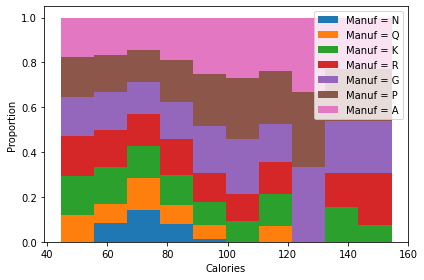

In [18]:
# Plotting the normalized version of histogram by using plt commands
p1 = plt.bar(x = ourbins[:,0], height = n_norm[:,0],width = ourbins[:, 1] - ourbins[:, 0])
p2 = plt.bar(x = ourbins[:,0], height = n_norm[:,1],width = ourbins[:, 1] - ourbins[:, 0],bottom = n_norm[:,0:1].sum(axis=1))
p3 = plt.bar(x = ourbins[:,0], height = n_norm[:,2],width = ourbins[:, 1] - ourbins[:, 0],bottom = n_norm[:,0:2].sum(axis=1))
p4 = plt.bar(x = ourbins[:,0], height = n_norm[:,3],width = ourbins[:, 1] - ourbins[:, 0],bottom = n_norm[:,0:3].sum(axis=1))
p5 = plt.bar(x = ourbins[:,0], height = n_norm[:,4],width = ourbins[:, 1] - ourbins[:, 0],bottom = n_norm[:,0:4].sum(axis=1))
p6 = plt.bar(x = ourbins[:,0], height = n_norm[:,5],width = ourbins[:, 1] - ourbins[:, 0],bottom = n_norm[:,0:5].sum(axis=1))
p7 = plt.bar(x = ourbins[:,0], height = n_norm[:,6],width = ourbins[:, 1] - ourbins[:, 0],bottom = n_norm[:,0:6].sum(axis=1))
plt.legend(['Manuf = N', 'Manuf = Q','Manuf = K','Manuf = R','Manuf = G','Manuf = P','Manuf = A']) 
plt.savefig('fig-2-normalized-proportions.png')
plt.xlabel('Calories'); plt.ylabel('Proportion'); plt.show()